# Importing Necessary modules

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Download NLTK resources

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
# Load the dataset
data = pd.read_csv('D:\\spam.csv', encoding='latin1')
data.info()
print("\n\n",data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


   label                                               text Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  


[nltk_data] Downloading package stopwords to C:\Users\Balu
[nltk_data]     Chitturi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Balu
[nltk_data]     Chitturi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Drop rows with missing values

In [3]:
data = data.dropna()

# Or impute missing values
data = data.fillna(value='unknown')
print(data)


     label                                               text  \
281    ham                                \Wen u miss someone   
1038   ham  Edison has rightly said, \A fool can ask more ...   
2255   ham      I just lov this line: \Hurt me with the truth   
3525   ham  \HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...   
4668   ham  When I was born, GOD said, \Oh No! Another IDI...   
5048   ham  Edison has rightly said, \A fool can ask more ...   

                                             Unnamed: 2  \
281    the person is definitely special for u..... B...   
1038                                                 GN   
2255                                       I don't mind   
3525                                   HAD A COOL NYTHO   
4668                                           GOD said   
5048                                                 GN   

                                    Unnamed: 3  \
281                           why to miss them   
1038                          

# Preprocessing
# Remove special characters and digits

In [4]:

data['text'] = data['text'].str.replace(r'\W|\d', ' ')

# Convert to lowercase
data['text'] = data['text'].str.lower()

# Initialize stop_words
stop_words = set(stopwords.words('english'))

# Lemmatization using WordNetLemmatizer

In [5]:

lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in word_tokenize(x) if word not in stop_words])


# Check if the document is not empty before joining

In [6]:
data['text'] = data['text'].apply(lambda x: ' '.join(x) if x else '')

# Feature Engineering

In [7]:
data['length'] = data['text'].apply(len)  # Length of the email
data['num_digits'] = data['text'].apply(lambda x: sum(c.isdigit() for c in x))  # Number of digits in the email
data['num_words'] = data['text'].apply(lambda x: len(x.split()))  # Number of words in the email
data['contains_offer'] = data['text'].apply(lambda x: 1 if 'offer' in x else 0)  # Presence of the keyword 'offer'

# Vectorization

In [9]:
vectorizer = CountVectorizer(max_features=5000)
X_count = vectorizer.fit_transform(data['text'])

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])


# Combine features

In [10]:
X_features = np.hstack([X_count.toarray(), X_tfidf.toarray(), data[['length', 'num_digits', 'num_words', 'contains_offer']].values])

y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Train the models
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True)
}



# Final Model for Spam Detection using Confusion and Navie's Bayes Multimodel 

[nltk_data] Downloading package stopwords to C:\Users\Balu
[nltk_data]     Chitturi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Balu
[nltk_data]     Chitturi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Balu
[nltk_data]     Chitturi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Model: Naive Bayes
Accuracy: 0.9838565022421525
Confusion Matrix:
[[958   7]
 [ 11 139]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.95      0.93      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Model: SVM
Accuracy: 0.979372197309417
Confusion Matrix:
[[961   4]
 [ 19 131]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115





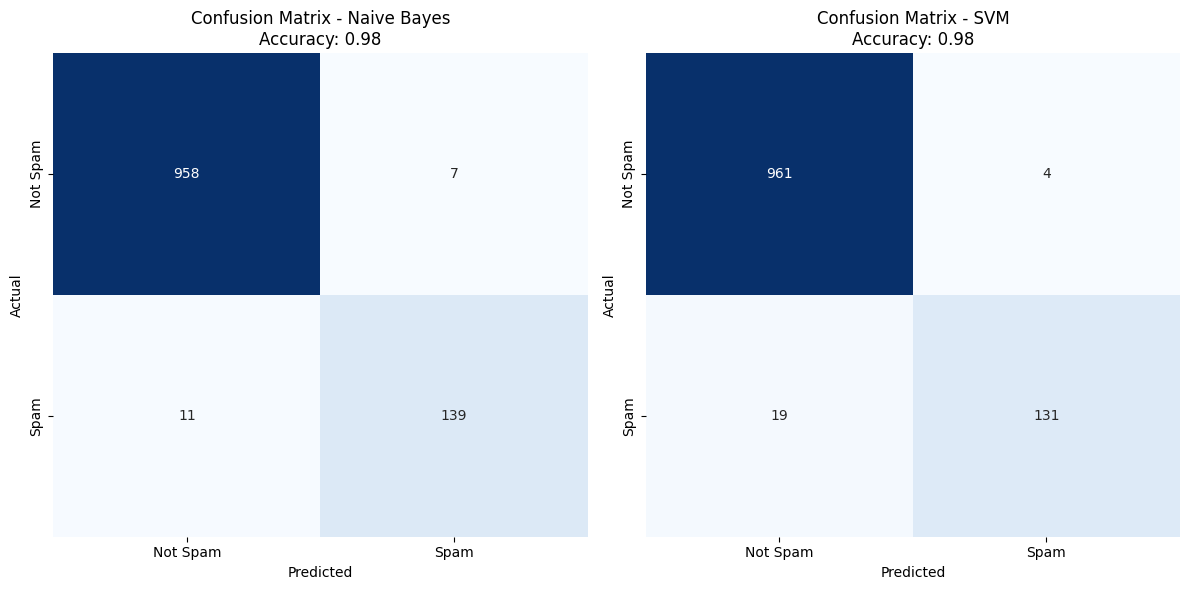

Model: Naive Bayes - Prediction: Not Spam
Model: SVM - Prediction: Not Spam


In [2]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Load the dataset
data = pd.read_csv('D:\\spam.csv', encoding='latin1')

# Preprocessing
# Remove special characters and digits
data['text'] = data['text'].str.replace(r'\W|\d', ' ')

# Convert to lowercase
data['text'] = data['text'].str.lower()

# Initialize stop_words
stop_words = set(stopwords.words('english'))

# Lemmatization using WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in stop_words]))

# Vectorization
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text'])
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#@ Test 
# Train the models
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Confusion Matrix': confusion_matrix(y_test, y_pred)}

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
    print('\n')

# Save the trained models using joblib
for name, model in models.items():
    # Replace 'path_to_model_' with the actual path where you want to save your trained models
    model_filename = f'D:\{name}.joblib'
    joblib.dump(model, model_filename)

# Visualize Confusion Matrix Heatmap
plt.figure(figsize=(12, 6))
for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 2, i)
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title(f'Confusion Matrix - {name}\nAccuracy: {result["Accuracy"]:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()

plt.show()

# Test the models on a new email
new_email = "Buy one get one free! Hurry!"

# Preprocessing
new_email = re.sub(r'\W|\d', ' ', new_email)
new_email = new_email.lower()
new_email_tokens = word_tokenize(new_email)
new_email_tokens = [lemmatizer.lemmatize(word) for word in new_email_tokens if word not in stop_words]
new_email = ' '.join(new_email_tokens)

# Use the same CountVectorizer for the new email as used during training
new_email_count_vector = vectorizer.transform([new_email])

# Concatenate the features
new_email_features = new_email_count_vector.toarray()

# Predict
for name, model in models.items():
    probability = model.predict_proba(new_email_features.reshape(1, -1))
    if probability[0][1] > 0.5:
        print(f'Model: {name} - Prediction: Spam')
    else:
        print(f'Model: {name} - Prediction: Not Spam')
